# Loan Prediction System 📚
 In this notebook, we are going to make an end to end project, Loan Prediction System we will also deploy it.

Outline 📚 Loading and Exploring the data

Working with Missing values

Dropping Unecessary columns

Visualization Or Making a Story Board

Encoding the Categorical data

Model Development using stream lit

In [48]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

In [49]:
df = pd.read_csv("train_ctrUa4K.csv") 
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [52]:
df.shape

(614, 13)

In [53]:
#Missing data
df.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
#Create function to  sum and determine  missing data
def missing_values(df): 
    a = num_null_values = df.isnull().sum()  
    return a 


In [55]:
missing_values(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
## Checking if dataset contains any null
feature_na=[]
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
print(feature_na)
""""
format()= This method of the built-in string class provides functionality for complex variable substitutions and value formatting.
This new formatting technique is regarded as more elegant.
syntax =string.format(var1, var2,…)
"""
#df['rate'].isnull().sum()/len(df)*100                (divide the number of missing values by number of total values)X100
for feature in feature_na:
    print('{} has {}% missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4) ))

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Gender has 2.1173% missing values
Married has 0.4886% missing values
Dependents has 2.443% missing values
Self_Employed has 5.2117% missing values
LoanAmount has 3.5831% missing values
Loan_Amount_Term has 2.2801% missing values
Credit_History has 8.1433% missing values


In [57]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [58]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
df['Dependents'].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [60]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [61]:
#Remove unused Features
df.drop(["Loan_ID"], axis=1, inplace=True)


In [62]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Categorical Data
#### 1-Married
#### 2-Education
#### 3-Property_Area(No Missing Values)
#### 4-Loan_Status(our Target)
#### 5-Education 

In [63]:
cols = df[["Gender", "Married", "Self_Employed"]] 
for  i in cols: 
    df[i].fillna(df[i].mode().iloc[0], inplace=True)



In [64]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [65]:
for feature in feature_na:
    print('{} has {}% missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4) ))

Gender has 0.0% missing values
Married has 0.0% missing values
Dependents has 2.443% missing values
Self_Employed has 0.0% missing values
LoanAmount has 3.5831% missing values
Loan_Amount_Term has 2.2801% missing values
Credit_History has 8.1433% missing values


In [66]:
missing_values(df)


Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Numerical Data
#### 1-ApplicantIncome
#### 2-LoanAmount
#### 3-CoapplicantIncome
#### 4-Loan_Amount_Term
#### 5-Credit_History

In [67]:
#### Dealing with Numerical Values missig_data  

n_cols = df[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    df[i].fillna(df[i].mean(axis=0), inplace=True)


In [68]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [69]:
missing_values(df)


Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
#remove Dependents feature  as data is un clear
df.drop(["Dependents"], axis=1, inplace=True)


In [71]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [72]:
missing_values(df)


Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

In [73]:
# will create function to visualize loan status abd its distrubtion with repect to any Feature using (col) and Bar chart
def bar_chart(col):
    Approved = df[df["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = df[df["Loan_Status"]=="N"][col].value_counts() 
    df1=pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")
    


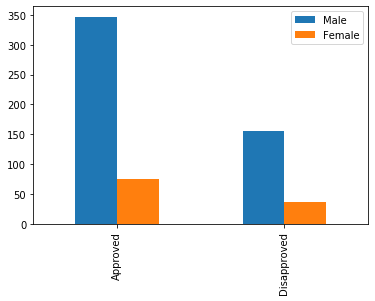

In [74]:
bar_chart("Gender")


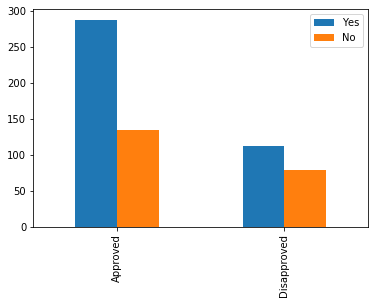

In [75]:
bar_chart("Married")


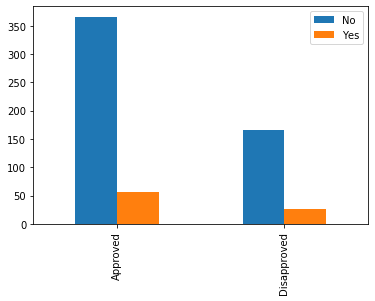

In [76]:
bar_chart("Self_Employed")


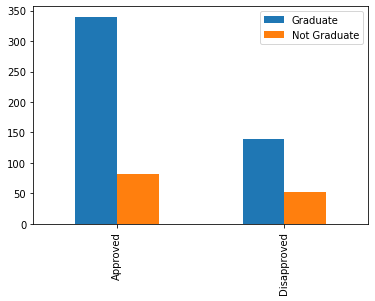

In [77]:
bar_chart("Education")


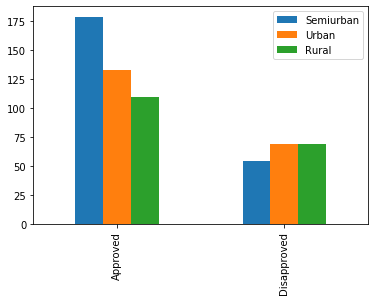

In [78]:
bar_chart("Property_Area")


In [79]:
cat = df.select_dtypes(include='object').columns
cat

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [80]:
code = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

In [81]:
encoder = OrdinalEncoder()
df[code]=encoder.fit_transform(df[code])

In [82]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [83]:
df[code].astype('int')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [84]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [85]:
x = df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
models = list()
models.append(('Tree',DecisionTreeClassifier()))
models.append(('Logistic',LogisticRegression()))
models.append(('XGB',XGBClassifier()))
models.append(('Random',RandomForestClassifier()))

for model in models:
    steps=list()
    steps.append(('Scaler',StandardScaler()))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores=cross_validate(pipeline,x,y,cv=5,scoring='accuracy',return_train_score=True)
    print(model[0])
    print("Train_Accuracy",scores["train_score"].mean())
    print("Test_Accuracy",scores["test_score"].mean())
    print('-'*70)

Tree
Train_Accuracy 1.0
Test_Accuracy 0.7084499533519926
----------------------------------------------------------------------
Logistic
Train_Accuracy 0.8127059427417084
Test_Accuracy 0.8045848327335733
----------------------------------------------------------------------
XGB
Train_Accuracy 1.0
Test_Accuracy 0.7589630814340931
----------------------------------------------------------------------
Random
Train_Accuracy 1.0
Test_Accuracy 0.7882980141276821
----------------------------------------------------------------------


In [102]:
steps = list()
steps.append(("Scaler" , StandardScaler() ))
steps.append(("Model" , LogisticRegression()))

In [103]:
pipeline = Pipeline(steps = steps)


In [104]:
scores = cross_validate(pipeline , x , y, cv = 5 , scoring="accuracy" , return_train_score=True)


In [105]:
scores["train_score"].mean()


0.8127059427417084

In [106]:
scores["test_score"].mean()


0.8045848327335733

In [107]:
model = pipeline.fit(x,y)


In [108]:
#forward = SequentialFeatureSelector(pipeline  , tol = None , direction="forward")


In [109]:
#forward.fit(x,y)

In [110]:
# data=pd.DataFrame(forward.transform(x) , columns=forward.get_feature_names_out())
# data

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=7)

In [112]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [113]:
model_1=pipeline.fit(x,y)


In [114]:
y_pred=pipeline.predict(x_test)


In [115]:
accuracy_score(y_test ,y_pred)


0.7886178861788617

In [116]:
model_1=pipeline.fit(x,y)


In [117]:
import joblib

In [118]:
joblib.dump(model_1,"model.h5")
joblib.dump(x.columns,"input.h5")


['input.h5']

In [120]:
x.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')